# Notebook

importing libraries

In [1]:
import numpy as np
import pandas as pd
import math

import matplotlib.pyplot as plt
import seaborn as sns

reading file

In [2]:
data = pd.read_csv('data/measurements.csv')

In [3]:
data.head()

,distance,consume,speed,temp_inside,temp_outside,specials,gas_type,AC,rain,sun,refill liters,refill gas
0,28,5,26,"21,5",12,NaN,E10,0,0,0,45,E10
1,12,"4,2",30,"21,5",13,NaN,E10,0,0,0,NaN,NaN
2,"11,2","5,5",38,"21,5",15,NaN,E10,0,0,0,NaN,NaN
3,"12,9","3,9",36,"21,5",14,NaN,E10,0,0,0,NaN,NaN
4,"18,5","4,5",46,"21,5",15,NaN,E10,0,0,0,NaN,NaN


In [4]:
data.shape

(388, 12)

## Data Exploration and Cleaning

Checking for missing values

In [5]:
for col in data.columns:
    print(data[col].value_counts(dropna=False))

11,8    37
16      24
12,3    23
12,4    18
15,4    14
        ..
44,9     1
36,6     1
9,9      1
16,8     1
14,7     1
Name: distance, Length: 174, dtype: int64
5       27
4,5     27
4,6     22
4,7     21
4,3     20
4,1     20
5,1     19
4,8     19
4,4     17
4       17
4,9     16
4,2     15
5,3     14
3,9     14
5,2     12
3,8     11
5,7     11
5,6     10
5,4      9
3,7      8
5,8      7
5,5      6
5,9      5
3,6      4
6,4      4
6,1      4
6,2      4
6        4
6,3      4
8,1      2
6,5      2
7,4      2
6,9      1
8,7      1
12,2     1
7,9      1
10,8     1
9,9      1
7,1      1
3,3      1
9        1
11,5     1
6,6      1
Name: consume, dtype: int64
42    18
43    17
38    16
26    15
36    15
33    15
40    15
32    12
44    12
37    12
29    11
39    11
55    11
46    11
45    10
58    10
25    10
24     9
50     9
35     9
57     8
41     8
52     7
53     6
48     6
28     6
30     6
21     6
61     6
51     6
47     5
56     5
22     5
34     4
49     4
27     4
62     4
59 

4 columns: temp_inside, specials, refill liters and refill gas

Percentage of missing values

In [6]:
data['temp_inside'].isna().sum()/len(data)

0.030927835051546393

In [7]:
data['specials'].isna().sum()/len(data)

0.7603092783505154

In [8]:
data['refill liters'].isna().sum()/len(data)

0.9664948453608248

In [9]:
data['refill gas'].isna().sum()/len(data)

0.9664948453608248

3% is low, so I will apply KNN after data transformation to fill the NaN \
above 50%, columns will be dropped

In [10]:
data.head()

,distance,consume,speed,temp_inside,temp_outside,specials,gas_type,AC,rain,sun,refill liters,refill gas
0,28,5,26,"21,5",12,NaN,E10,0,0,0,45,E10
1,12,"4,2",30,"21,5",13,NaN,E10,0,0,0,NaN,NaN
2,"11,2","5,5",38,"21,5",15,NaN,E10,0,0,0,NaN,NaN
3,"12,9","3,9",36,"21,5",14,NaN,E10,0,0,0,NaN,NaN
4,"18,5","4,5",46,"21,5",15,NaN,E10,0,0,0,NaN,NaN


In [11]:
data.columns = [x.lower() for x in data.columns]
data.columns

Index(['distance', 'consume', 'speed', 'temp_inside', 'temp_outside',
       'specials', 'gas_type', 'ac', 'rain', 'sun', 'refill liters',
       'refill gas'],
      dtype='object')

In [12]:
data.dtypes

distance         object
consume          object
speed             int64
temp_inside      object
temp_outside      int64
specials         object
gas_type         object
ac                int64
rain              int64
sun               int64
refill liters    object
refill gas       object
dtype: object

There are numbers with object-type so I will convert them to floats

In [13]:
def clean_columns(df, df_columns):
    '''function to convert numbers that are object-type to float-type'''
    
    df_copy = df.copy()
    
    for col in df_columns:
        df_copy[col] = [float(str(row).replace(',','.')) for row in df_copy[col]]
    
    return df_copy

In [14]:
data.drop(['specials', 'refill liters', 'refill gas'], axis=1, inplace=True)

In [15]:
clean_data = clean_columns(data, ['distance', 'consume', 'temp_inside'])
clean_data.head()

,distance,consume,speed,temp_inside,temp_outside,gas_type,ac,rain,sun
0,28.0,5.0,26,21.5,12,E10,0,0,0
1,12.0,4.2,30,21.5,13,E10,0,0,0
2,11.2,5.5,38,21.5,15,E10,0,0,0
3,12.9,3.9,36,21.5,14,E10,0,0,0
4,18.5,4.5,46,21.5,15,E10,0,0,0


In [16]:
clean_data.dtypes

distance        float64
consume         float64
speed             int64
temp_inside     float64
temp_outside      int64
gas_type         object
ac                int64
rain              int64
sun               int64
dtype: object

Encoding gas_type

In [17]:
y_color = clean_data['gas_type']

In [18]:
x = clean_data.drop(['consume'], axis=1)

In [19]:
x['gas_type'] = [0 if x=='SP98' else 1 for x in x['gas_type']]

## Data Transformation

In [20]:
from sklearn.preprocessing import PowerTransformer, MinMaxScaler

def transform(x):
    
    transformer = PowerTransformer()
    transformer.fit(x)

    x_tr = transformer.transform(x)
    x_tr = pd.DataFrame(x_tr, columns = x.columns)

    x_tr_mm = MinMaxScaler().fit(x_tr).transform(x_tr)
    x_tr_mm = pd.DataFrame(x_tr_mm, columns=x.columns) #convert np.array to pd.DataFrame
    
    return(x_tr_mm)

In [21]:
x_tr = transform(x)

### KNN to replace missing values

In [22]:
from sklearn.impute import KNNImputer

imputer = KNNImputer() #default = 5 neighbours

imputer = KNNImputer(n_neighbors=5)

x_knn = pd.DataFrame(imputer.fit_transform(x_tr), columns = x.columns)

In [23]:
x_knn.head()

,distance,speed,temp_inside,temp_outside,gas_type,ac,rain,sun
0,0.637550,0.290453,0.531791,0.627545,1.0,0.0,0.0,0.0
1,0.460622,0.363389,0.531791,0.649687,1.0,0.0,0.0,0.0
2,0.445710,0.488758,0.531791,0.692787,1.0,0.0,0.0,0.0
3,0.476189,0.459541,0.531791,0.671423,1.0,0.0,0.0,0.0
4,0.552624,0.594615,0.531791,0.692787,1.0,0.0,0.0,0.0


In [24]:
xy = pd.concat([x_knn,clean_data['consume']], axis=1)
xy.head()

,distance,speed,temp_inside,temp_outside,gas_type,ac,rain,sun,consume
0,0.637550,0.290453,0.531791,0.627545,1.0,0.0,0.0,0.0,5.0
1,0.460622,0.363389,0.531791,0.649687,1.0,0.0,0.0,0.0,4.2
2,0.445710,0.488758,0.531791,0.692787,1.0,0.0,0.0,0.0,5.5
3,0.476189,0.459541,0.531791,0.671423,1.0,0.0,0.0,0.0,3.9
4,0.552624,0.594615,0.531791,0.692787,1.0,0.0,0.0,0.0,4.5


## Data Visualization

In [25]:
def plot_countplot(df, column_list):
    '''Function to plot countplots for categorical dataframe:
    2 columns, n rows (number of columns of dataframe) '''
    
    plt_size = math.ceil(len(column_list)/2)  #define rows in subplot
    n = 0 #counter to attribute position for plot
    
    col_num = []
    row_num = []
    for i1 in [0,1]:
        for i2 in list(range(0,plt_size)):
            col_num.append(i1)
            row_num.append(i2)
    
    fig, ax = plt.subplots(plt_size,2, figsize=(20,40))
    
    #orient = orientation
    
    for i in column_list:
        sns.histplot(data = df, x = i, ax = ax[row_num[n],col_num[n]], color='#a1c9f4')    
        n += 1
                      
    plt.show()


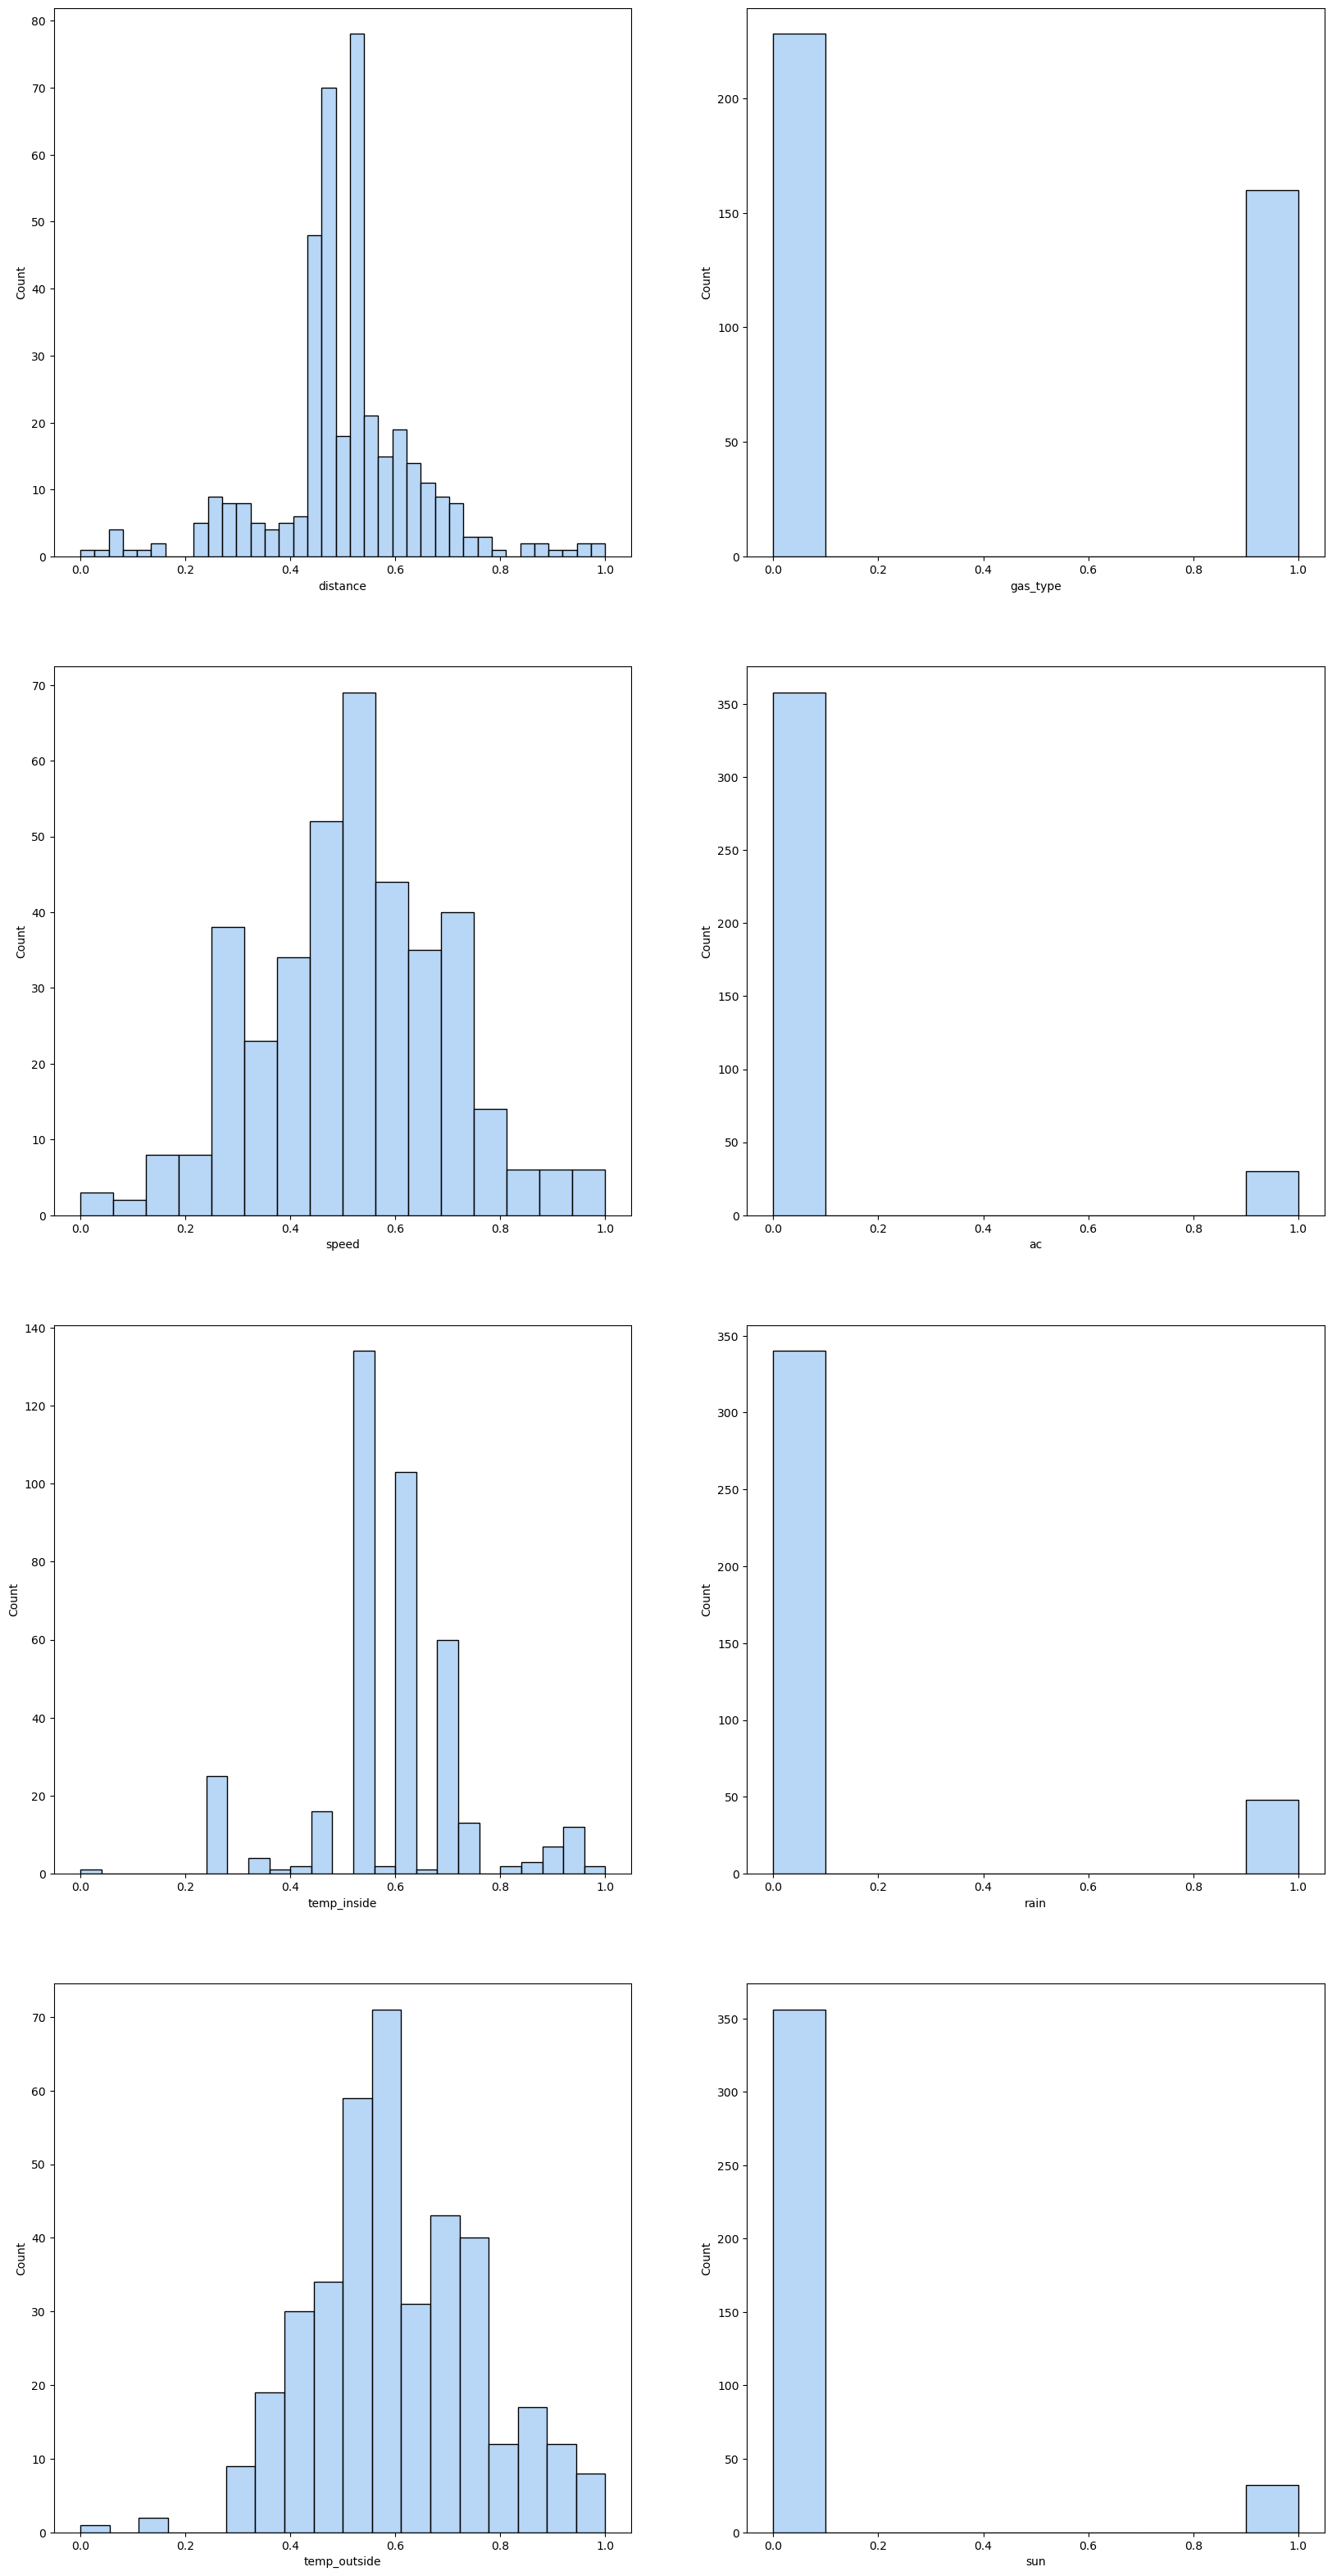

In [26]:
plot_countplot(x_knn, x_knn.columns)

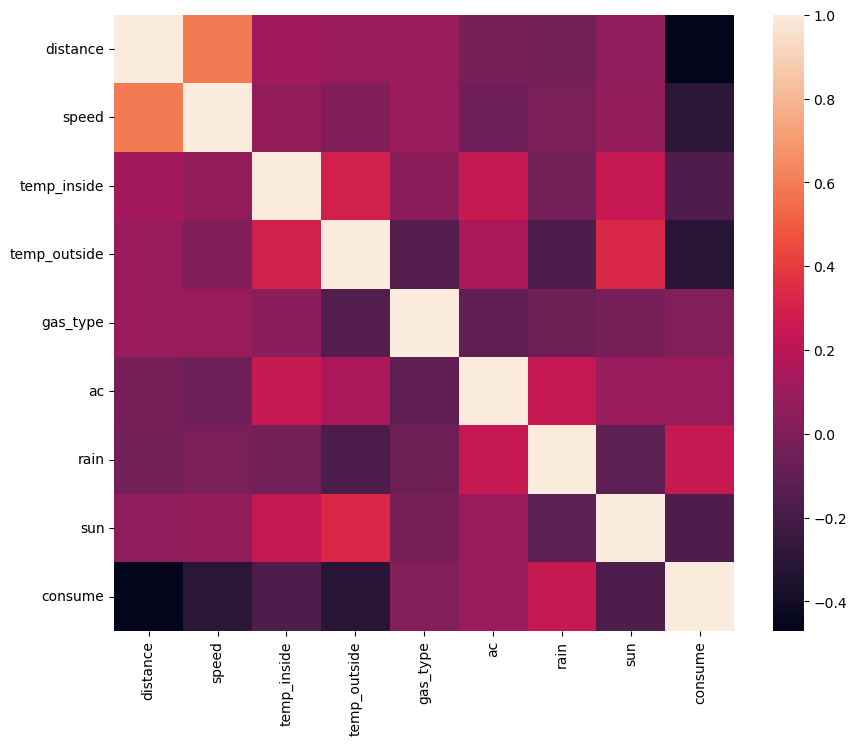

In [27]:
data_corr = xy.corr()

fig, ax = plt.subplots(figsize=(10,8))
sns.heatmap(data_corr, annot=False, ax=ax)  #annot = False, no values in the heatmap
plt.show()

This correlation map show us that there is not a lot of correlation between gas type and the x-features that we have\
 \
There is a correlation between distance, consume and speed (a fact known to every consumer trying to save fuel :) )\
 \
Also temperature outside, temperature inside and sun have some correlation

Let's check for outliers

In [28]:
def plot_boxplot(df):
    '''Function to plot boxplots for dataframe:
    2 columns, n rows (number of columns of dataframe) '''
     
    col_names = list(df)
    
    plt_size = math.ceil(len(col_names)/2)  #define rows in subplot
    n = 0 #counter to attribute position for plot
    
    #loop to attribute positions in rows and columns
    col_num = [] 
    row_num = []
    for i1 in [0,1]:
        for i2 in list(range(0,plt_size)):
            col_num.append(i1)
            row_num.append(i2)
       
    fig, ax = plt.subplots(plt_size,2, figsize=(10,10))
    
    #loop to plot boxplots
    for i in col_names:
        sns.boxplot(data = df[i], orient = 'h', color='#a1c9f4', ax = ax[row_num[n],col_num[n]])
        ax[row_num[n],col_num[n]].set_ylabel(i)
        n += 1
                                                        
    plt.show()

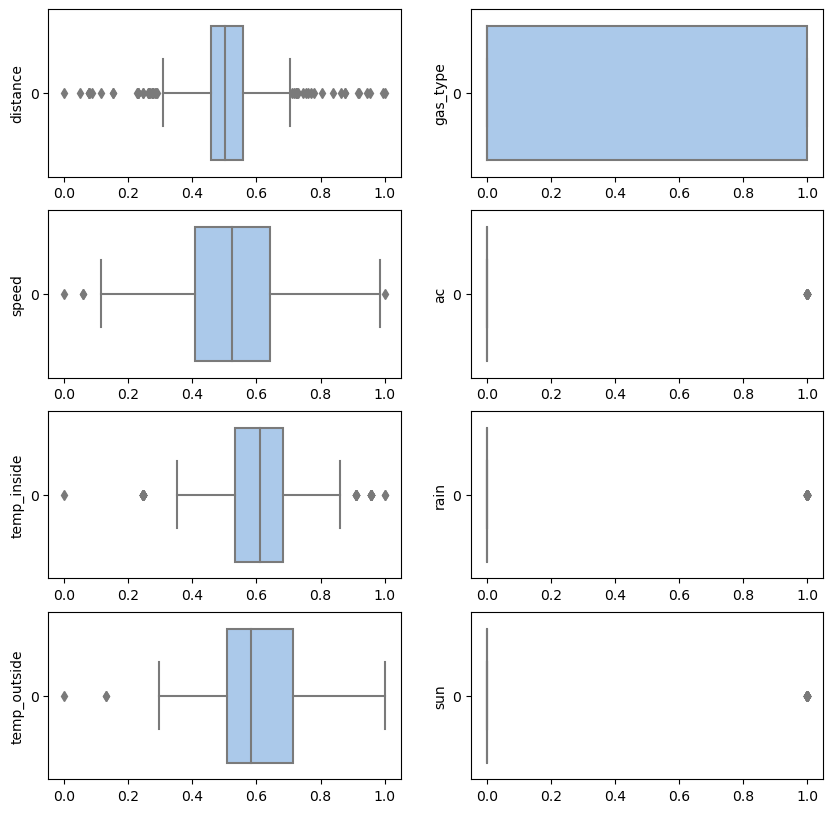

In [29]:
plot_boxplot(x_knn)

## Data Prediction

p-value will be defined as 0.05 to differentiate between null and alternative hypothesis

In [30]:
import scipy.stats as stats

In [31]:
clean_data.head()

,distance,consume,speed,temp_inside,temp_outside,gas_type,ac,rain,sun
0,28.0,5.0,26,21.5,12,E10,0,0,0
1,12.0,4.2,30,21.5,13,E10,0,0,0
2,11.2,5.5,38,21.5,15,E10,0,0,0
3,12.9,3.9,36,21.5,14,E10,0,0,0
4,18.5,4.5,46,21.5,15,E10,0,0,0


In [32]:
clean_data.groupby('gas_type').agg({'speed':'mean'})

,speed
gas_type,
E10,43.506250
SP98,40.820175


In [33]:
x.columns

Index(['distance', 'speed', 'temp_inside', 'temp_outside', 'gas_type', 'ac',
       'rain', 'sun'],
      dtype='object')

In [34]:
clean_data.pivot_table(columns = 'gas_type', values = ['distance', 'consume', 'speed', 'temp_inside', 'temp_outside', 'ac',
       'rain', 'sun'], aggfunc='mean')

gas_type,E10,SP98
ac,0.043750,0.100877
consume,4.931250,4.899123
distance,21.096250,18.639912
rain,0.100000,0.140351
speed,43.506250,40.820175
sun,0.075000,0.087719
temp_inside,21.917197,21.938356
temp_outside,10.118750,12.228070


### Is speed significantly different from 43 in E10?

<AxesSubplot:xlabel='speed'>

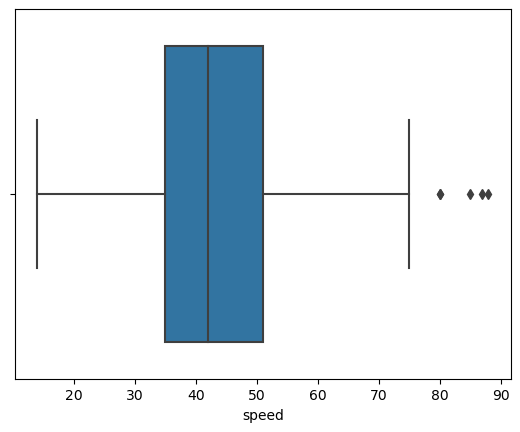

In [35]:
sns.boxplot(data = clean_data[clean_data['gas_type']=='E10'], x ='speed')

In [36]:
stats.ttest_1samp(clean_data[clean_data['gas_type']=='E10']['speed'], popmean = 43, alternative = "two-sided")

Ttest_1sampResult(statistic=0.45486827611413216, pvalue=0.6498244533551667)

p-value > 0.5, so null hypothesis is accepted, speed is significantly different from 43 using E10 fuel

### Is distance in average lower than 18 in SP98?

<AxesSubplot:xlabel='distance'>

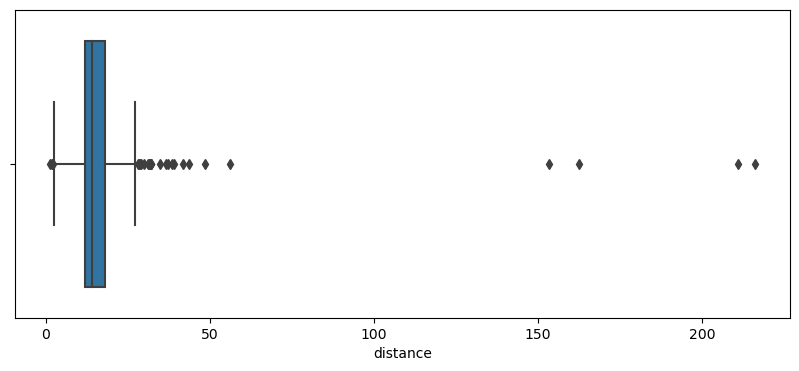

In [37]:
fig,ax = plt.subplots(figsize=(10,4))
sns.boxplot(data = clean_data[clean_data['gas_type']=='SP98'], x = 'distance', ax=ax)

In [38]:
stats.ttest_1samp(clean_data[clean_data['gas_type']=='SP98']['distance'], popmean = 18, alternative = "greater")

Ttest_1sampResult(statistic=0.3996122417996286, pvalue=0.34490893812553125)

p-value is > 0.05, as such, hypothesis of average being over 18 is rejected. As such,average is lower in average than 18

### In consume similar between the two fuels?

<AxesSubplot:xlabel='consume'>

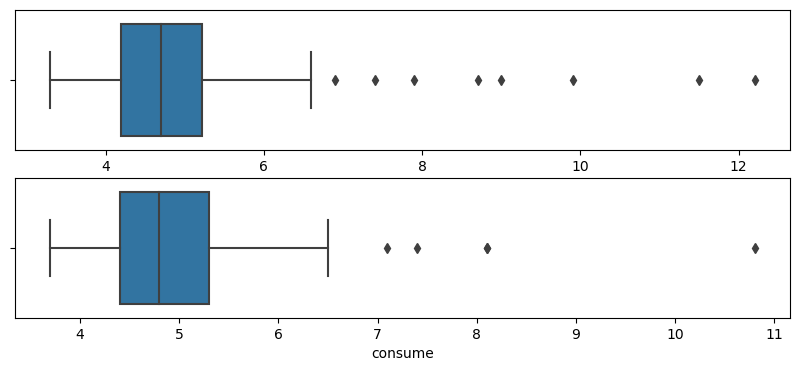

In [39]:
fig,ax = plt.subplots(2,1,figsize=(10,4))
sns.boxplot(data = xy[xy['gas_type']==0], x = 'consume', ax=ax[0])
sns.boxplot(data = xy[xy['gas_type']==1], x = 'consume', ax=ax[1])

In [40]:
stats.ttest_ind(xy[xy['gas_type']==1]['consume'], xy[xy['gas_type']==0]['consume'])

Ttest_indResult(statistic=0.3011626300254617, pvalue=0.7634526478628367)

Null hypothesis is accepted, samples have similar consumes, as p-value > 0.5

## Which Fuel is Best?

### Linear model to predict consume when using E10

In [41]:
xy_E10 = xy[xy['gas_type']==1]
xy_E10

,distance,speed,temp_inside,temp_outside,gas_type,ac,rain,sun,consume
0,0.637550,0.290453,0.531791,0.627545,1.0,0.0,0.0,0.0,5.0
1,0.460622,0.363389,0.531791,0.649687,1.0,0.0,0.0,0.0,4.2
2,0.445710,0.488758,0.531791,0.692787,1.0,0.0,0.0,0.0,5.5
3,0.476189,0.459541,0.531791,0.671423,1.0,0.0,0.0,0.0,3.9
4,0.552624,0.594615,0.531791,0.692787,1.0,0.0,0.0,0.0,4.5
...,...,...,...,...,...,...,...,...,...
344,0.523418,0.363389,0.957514,0.713809,1.0,1.0,1.0,0.0,5.1
345,0.522101,0.543700,0.610212,0.692787,1.0,0.0,0.0,0.0,4.0
346,0.514005,0.516776,0.610212,0.754923,1.0,0.0,0.0,0.0,4.8
347,0.537352,0.444447,0.610212,0.713809,1.0,0.0,0.0,0.0,3.9


In [42]:
x_10 = xy_E10.drop(['consume','gas_type'],axis=1)
y_10 = xy_E10['consume']

In [43]:
y_10.shape

(160,)

As data is a little imbalaced and small, I am doing data upscaling

In [44]:
from sklearn.model_selection import train_test_split

np.random.seed(10)      #fix the random number generator, useful if you are including different columns
x_tr, x_te, y_tr, y_te = train_test_split(x_10,y_10, test_size=0.3, random_state=100) 

In [45]:
from sklearn.linear_model import LinearRegression

    #all functions from sklearn result in np.arrays

lm = LinearRegression() #fit_intercept - if False, b = 0

model = lm.fit(x_tr,y_tr) #train the model (values to make prediction, values to predict)

y_pred_te = lm.predict(x_te)

b = lm.intercept_       #know intercept on y-axis
m = lm.coef_            #know slope

print('consume = {}*x + {}'.format(m,b))
#scoring
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

print('r2', r2_score(y_pred_te, y_te))
print('mse',  mean_squared_error(y_pred_te, y_te))
print('rmse', math.sqrt(mean_squared_error(y_pred_te, y_te)))
print('mae',  mean_absolute_error(y_pred_te, y_te))

print(np.mean(y_pred_te))

consume = [-2.49050519 -0.24056705  0.29163442 -1.54262577  0.00374174  0.97008871
 -0.29735524]*x + 7.0066755827056895
r2 -1.168644384318577
mse 0.7045945533140608
rmse 0.8394013064762652
mae 0.6383819653499815
5.024751046208968


### Linear model to predict consume when using SP98

In [46]:
xy_SP98 = xy[xy['gas_type']==0]

In [47]:
x_98 = xy_SP98.drop(['consume','gas_type'],axis=1)
y_98 = xy_SP98['consume']

In [48]:
np.random.seed(10)      #fix the random number generator, useful if you are including different columns
x_tr, x_te, y_tr, y_te = train_test_split(x_98,y_98, test_size=0.3, random_state=100) 

In [49]:
lm = LinearRegression() #fit_intercept - if False, b = 0

model98 = lm.fit(x_tr,y_tr) #train the model (values to make prediction, values to predict)

y_pred_te = lm.predict(x_te)

b = lm.intercept_       #know intercept on y-axis
m = lm.coef_            #know slope

print('consume = {}*x + {}'.format(m,b))
#scoring

print('r2', r2_score(y_pred_te, y_te))
print('mse',  mean_squared_error(y_pred_te, y_te))
print('rmse', math.sqrt(mean_squared_error(y_pred_te, y_te)))
print('mae',  mean_absolute_error(y_pred_te, y_te))

print(np.mean(y_pred_te))

consume = [-4.55647013 -0.24045282 -0.81051046 -1.34174294  0.47345817  0.49886664
  0.02210601]*x + 8.511514827525353
r2 -0.27166760066144313
mse 0.678460399282619
rmse 0.823687076068709
mae 0.6573186568360087
4.937642388925561


Car is consuming more when using E10 than SP98

In [50]:
import altair as alt

alt.Chart(clean_data).mark_point().encode(x='consume', y='consume', color='gas_type').interactive()

alt.Chart(...)

In [51]:
chart1 = alt.Chart(clean_data).mark_point().encode(x='distance', y='consume', color='gas_type').interactive()
chart2 = alt.Chart(clean_data).mark_point().encode(x='speed', y='consume', color='gas_type').interactive()

chart1 | chart2

alt.HConcatChart(...)

There is a higher consume when speed is low in SP98.

### Variance

In [52]:
xy[xy['gas_type']==1].var()

distance        0.020784
speed           0.032373
temp_inside     0.007967
temp_outside    0.024569
gas_type        0.000000
ac              0.042099
rain            0.090566
sun             0.069811
consume         0.811722
dtype: float64

In [53]:
xy[xy['gas_type']==0].var()

distance        0.019000
speed           0.031132
temp_inside     0.030786
temp_outside    0.026697
gas_type        0.000000
ac              0.091101
rain            0.121184
sun             0.080377
consume         1.250836
dtype: float64

SP98 has lower variance in distance, speed (small difference), temperature inside-temperature outside, ac, rain and sun but more variance in consume

### Consume when AC is on

In [54]:
alt.Chart(clean_data).mark_point().encode(x='ac', y='consume', color='gas_type').interactive()

alt.Chart(...)

### Consume when is raining

In [55]:
alt.Chart(clean_data).mark_point().encode(x='rain', y='consume', color='gas_type').interactive()

alt.Chart(...)

## Remarks:
E10 consumes more than SP98 however E10 suffered from more variance in distance, ac, and weather conditions. As such, I believe more data should be gathered as to compare both fuels within the same conditions. SP98 shows more variance in consume, therefore, driving has to be done more carefully in order to not influence consume too much.